# Group by and Aggregating

In [2]:
import pandas as pd      

In [3]:
df = pd.read_csv(r"C:\Users\satya\Project Data Science\Flavors.csv")
df

,Flavor,Base Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
0,Mint Chocolate Chip,Vanilla,Yes,10.0,8.0,18.0
1,Chocolate,Chocolate,Yes,8.8,7.6,16.6
2,Vanilla,Vanilla,No,4.7,5.0,9.7
3,Cookie Dough,Vanilla,Yes,6.9,6.5,13.4
4,Rocky Road,Chocolate,Yes,8.2,7.0,15.2
5,Pistachio,Vanilla,No,2.3,3.4,5.7
6,Cake Batter,Vanilla,Yes,6.5,6.0,12.5
7,Neapolitan,Vanilla,No,3.8,5.0,8.8
8,Chocolte Fudge Brownie,Chocolate,Yes,8.2,7.1,15.3


In [4]:
group_by_frame = df.groupby('Base Flavor')

In [5]:
group_by_frame.mean()

,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,
Chocolate,8.4,7.233333,15.70
Vanilla,5.7,5.650000,11.35


In [6]:
df.groupby('Base Flavor').min()

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,Chocolate,Yes,8.2,7.0,15.2
Vanilla,Cake Batter,No,2.3,3.4,5.7


In [7]:
df.groupby('Base Flavor').max()

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,Rocky Road,Yes,8.8,7.6,16.6
Vanilla,Vanilla,Yes,10.0,8.0,18.0


In [8]:
df.groupby('Base Flavor').sum()

,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,
Chocolate,25.2,21.7,47.1
Vanilla,34.2,33.9,68.1


In [9]:
df.groupby('Base Flavor').agg({'Flavor Rating' : ['mean','max','count','sum'] })

Flavor Rating                  
                     mean   max count   sum
Base Flavor                                
Chocolate             8.4   8.8     3  25.2
Vanilla               5.7  10.0     6  34.2

In [10]:
df.groupby('Base Flavor').agg({'Texture Rating' : ['mean','max','count','sum'] })

Texture Rating                 
                      mean  max count   sum
Base Flavor                                
Chocolate         7.233333  7.6     3  21.7
Vanilla           5.650000  8.0     6  33.9

In [11]:
df.groupby('Base Flavor').agg({'Flavor Rating' : ['mean','max','count','sum'], 'Texture Rating' : ['mean','max','count','sum']})

Flavor Rating                   Texture Rating                 
                     mean   max count   sum           mean  max count   sum
Base Flavor                                                                
Chocolate             8.4   8.8     3  25.2       7.233333  7.6     3  21.7
Vanilla               5.7  10.0     6  34.2       5.650000  8.0     6  33.9

In [12]:
df.groupby(['Base Flavor','Liked']).mean()

Flavor Rating  Texture Rating  Total Rating
Base Flavor Liked                                             
Chocolate   Yes              8.4        7.233333     15.700000
Vanilla     No               3.6        4.466667      8.066667
            Yes              7.8        6.833333     14.633333

In [13]:
df.groupby(['Base Flavor','Liked']).agg({'Flavor Rating' : ['mean','max','count','sum'] })

Flavor Rating                  
                           mean   max count   sum
Base Flavor Liked                                
Chocolate   Yes             8.4   8.8     3  25.2
Vanilla     No              3.6   4.7     3  10.8
            Yes             7.8  10.0     3  23.4

In [14]:
df.groupby('Base Flavor').describe()

Flavor Rating                                             \
                    count mean       std  min    25%  50%  75%   max   
Base Flavor                                                            
Chocolate             3.0  8.4  0.346410  8.2  8.200  8.2  8.5   8.8   
Vanilla               6.0  5.7  2.710719  2.3  4.025  5.6  6.8  10.0   

            Texture Rating            ...             Total Rating         \
                     count      mean  ...    75%  max        count   mean   
Base Flavor                           ...                                   
Chocolate              3.0  7.233333  ...  7.350  7.6          3.0  15.70   
Vanilla                6.0  5.650000  ...  6.375  8.0          6.0  11.35   

                                                         
                  std   min     25%   50%     75%   max  
Base Flavor                                              
Chocolate    0.781025  15.2  15.250  15.3  15.950  16.6  
Vanilla      4.263684   5.7   9.025  11.1  13.175  18.0  

[2 rows x 24 columns]

# Merge, Join, and Concatenate

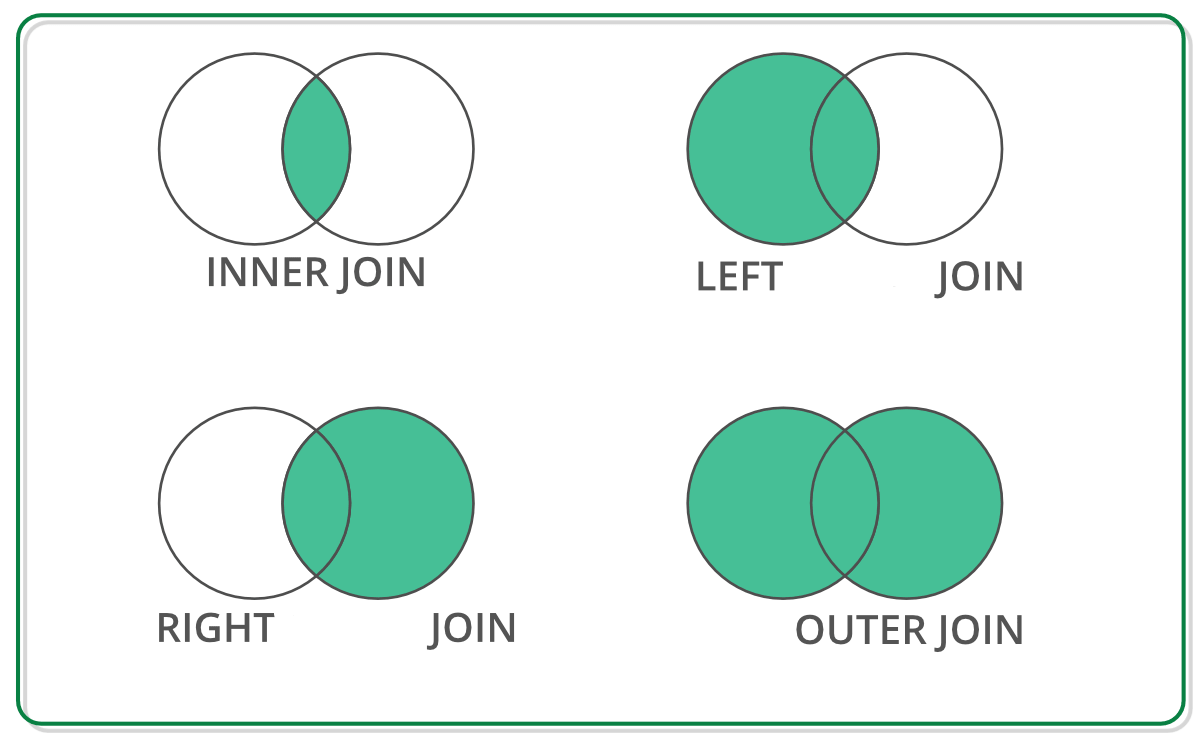

In [15]:
from IPython.display import Image

Image(filename='merging.png', width=300, height=200)


In [16]:
import pandas as pd
df1 = pd.read_csv(r"C:\Users\satya\Project Data Science\LOTR.csv")
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [17]:
df2 = pd.read_csv(r"C:\Users\satya\Project Data Science\LOTR 2.csv")
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [18]:
# Inner join
df1.merge(df2)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [19]:
df1.merge(df2, how = 'inner', on = 'FellowshipID')
"""
- how='inner': This parameter specifies the merge type.
- 'inner' indicates that only rows that have matching key values in both DataFrames will be included in the merge result.
- on='FellowshipID': This parameter indicates the column or key that is used as a reference for the merge. In this case, the merge is performed based on the 'FellowshipID' column.
"""

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [20]:
df1.merge(df2, how = 'inner', on = ['FellowshipID', 'FirstName'])
"""
The merge is done based on two columns, namely 'FellowshipID' and 'FirstName'. 
This means the merge result will contain rows that have the same FellowshipID and FirstName values in both DataFrames.
"""

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [21]:
# Outer join
df1.merge(df2, how = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [22]:
# Left join
df1.merge(df2, how = 'left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [23]:
# Right join
df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [25]:
# Cross join
df1.merge(df2, how = 'cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [27]:
df1.join(df2, on = 'FellowshipID', how = 'outer', lsuffix = '_Left', rsuffix = '_Right')
"""
lsuffix='_Left' and rsuffix='_Right': 
These parameters are used to add suffixes to columns coming from df1 and df2 to avoid column name conflicts. 
By adding suffixes, we can distinguish between columns that have the same name in both DataFrames.
"""

,FellowshipID,FellowshipID_Left,FirstName_Left,Skills,FellowshipID_Right,FirstName_Right,Age
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0


In [28]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'),lsuffix = '_Left', rsuffix = '_Right')
df4
"""
Change the index on DataFrame 1 (df1) to 'FellowshipID'
Change the index on DataFrame 2 (df2) to 'FellowshipID'
Use the join method to merge the two DataFrames that have had their indexes changed. The join is done based on the index (column 'FellowshipID'). Parameters lsuffix='_Left' and rsuffix='_Right'
"""

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN


In [29]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'),lsuffix = '_Left', rsuffix = '_Right', how = 'outer')
df4
"""
The how='outer' parameter indicates that the merge is performed as an "outer join", which means that all rows from both DataFrames will be included in the merge result. 
If there are unmatched FellowshipID values in both DataFrames, the columns with no values will be filled with NaN.
"""

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


In [32]:
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [33]:
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [30]:
pd.concat([df1,df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [31]:
pd.concat([df1,df2], join = 'outer', axis = 1)
"""
join='outer': This parameter indicates that the join is done as an "outer join", which means that all columns from both DataFrames will be included in the join result, and if there is a column that only exists in one of the DataFrames, then the column will be filled with a NaN value in the part that has no data.
axis=1: This parameter specifies that the merging is done based on the column axis (horizontal), so the columns of the two DataFrames will be merged together.
"""

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51
